<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Copy_of_1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_01_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

In [ ]:
# prompt: data라는 폴더를 만들자

import os

# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Directory 'data' created successfully.")
else:
    print("Directory 'data' already exists.")


Directory 'data' created successfully.


In [ ]:
# prompt: excel_file_path의 엑셀 파일은 여러개 시트로 구성되어 있는데 이 시트를 모두 읽어야 한다

import pandas as pd
import pyarrow

# Install pyarrow if not already installed
try:
    import pyarrow
except ImportError:
    !pip install pyarrow

# Read the Excel file into a pandas DataFrame, reading all sheets
excel_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.xlsx'
dfs = pd.read_excel(excel_file_path, sheet_name=None) # sheet_name=None reads all sheets

# Process each sheet
for sheet_name, df in dfs.items():
    parquet_file_path = f'/content/data/{sheet_name}.parquet'  # Create a separate parquet file for each sheet
    df.to_parquet(parquet_file_path)
    print(f"Successfully converted sheet '{sheet_name}' to parquet format and saved as '{parquet_file_path}'")

Successfully converted sheet 'Sheet_1' to parquet format and saved as '/content/data/Sheet_1.parquet'
Successfully converted sheet 'Sheet_2' to parquet format and saved as '/content/data/Sheet_2.parquet'
Successfully converted sheet 'Sheet_3' to parquet format and saved as '/content/data/Sheet_3.parquet'
Successfully converted sheet 'Sheet_4' to parquet format and saved as '/content/data/Sheet_4.parquet'
Successfully converted sheet 'Sheet_5' to parquet format and saved as '/content/data/Sheet_5.parquet'
Successfully converted sheet 'Sheet_6' to parquet format and saved as '/content/data/Sheet_6.parquet'
Successfully converted sheet 'Sheet_7' to parquet format and saved as '/content/data/Sheet_7.parquet'
Successfully converted sheet 'Sheet_8' to parquet format and saved as '/content/data/Sheet_8.parquet'
Successfully converted sheet 'Sheet_9' to parquet format and saved as '/content/data/Sheet_9.parquet'
Successfully converted sheet 'Sheet_10' to parquet format and saved as '/content/d

In [ ]:
# prompt: 모든 parquet 파일을 읽어 하나의 파일로 만들어줘
import glob
import os

# Get a list of all parquet files in the current directory
parquet_files = glob.glob('./data/*.parquet')

# Create an empty list to store dataframes
dfs = []

# Iterate through each parquet file
for file in parquet_files:
    # Read the parquet file into a pandas DataFrame
    df = pd.read_parquet(file)
    # Append the dataframe to the list
    dfs.append(df)

print(f'The numer of dataframes: {len(dfs)}')

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Specify the output path for the combined parquet file
output_file = './combined.parquet'

# Save the combined dataframe to a single parquet file
combined_df.to_parquet(output_file)

print(f"Successfully combined all parquet files into '{output_file}'")

The numer of dataframes: 20
Successfully combined all parquet files into './combined.parquet'


In [ ]:
combined_df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,8.100101e+06,20240805,KBS,배지현,"‘찜통 더위’ 피하러 강으로, 놀이공원으로",사회>날씨,문화>출판,문화>방송_연예,None,None,None,None,"한강,서울,강남구,은평구,한국,서울시",겨울왕국,"찜통,더위,놀이공원,앵커,날씨,얼음,폭염,빙판,시민들,모습,배지현,리포트,불볕,더위...","배지현,시민들,놀이공원,영상편집,최원석,서울시,김예은,강남구,조해신,한강,촬영기자,...",[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...,https://news.kbs.co.kr/news/view.do?ncd=802810...,None
1,4.100608e+06,20240917,브레이크뉴스,박동제 기자,"에스파 1위, 9월 아이돌그룹 브랜드평판 정상 등극..2위 아이브 3위 세븐틴",경제>증권_증시,경제>산업_기업,경제>자동차,None,None,None,"브레이크뉴스,세븐틴,아이브,에스파","la,La,Korea","Reputation Research Institute,aespa,Hoshi,Seun...","에스파,등극,아이,그룹,브랜드,평판,정상,2위,아이브,3위,세븐틴,에스파,aespa...","brand,reputation,index,idol,group,브랜드평판,place,...","▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...",http://www.breaknews.com/1057195,None
2,8.100101e+06,20241010,KBS,이유진,보은대추축제 내일부터 열흘간 개최,문화>전시_공연,지역>강원,문화>요리_여행,None,None,None,None,"한강,경기,백두,보은,뱃들공원,속리산,보청천,태백",1kg,"보은대추축제,열흘간,개최,보은대추축제,열흘,뱃들공원,속리산,일대,행사,생대추,크기,...","생대추,보청천,마리,힘겨루기,트로트,마술쇼,속리산,한강,태백,백두,뱃들,보은대추축제...",[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...,https://news.kbs.co.kr/news/view.do?ncd=807800...,None
3,8.100301e+06,20241012,SBS,심우섭 기자,"""울면서 번역했어요"" 일등공신 번역가들",문화>전시_공연,문화>출판,문화>미술_건축,None,None,None,"데버라,박상영","스페인,스웨덴,영국,터내셔널,영미권,한국,적도","한강,맨부커","번역,일등공신,번역가들,앵커,그동안,문학,작품,번역,어려움,세계,무대,가치,쾌거,현...","한강,번역가,채식주의자,데버라,번역가들,스미스,스웨덴,카린,안나,심우섭,인터내셔널,...",<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...,https://news.sbs.co.kr/news/endPage.do?news_id...,None
4,1.100701e+06,20240718,세계일보,None,서울 잠수교 차량 보행자 통행 전면 통제,사회>환경,None,None,None,None,None,None,"한강,서울,인도,팔당댐,잠수교,서울시,서초구,중부지방","재난안전대책본부,경찰,잠수교,서울시","차량,서울,잠수교,보행자,통제,통행,전면,집중호우,한강,수위,상승,18일,서울,잠수...","잠수교,서울시,서울,집중호우,한강,보행자,보행로,대중교통,팔당댐,방류량,8천,관계자...",집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...,http://www.segye.com/content/html/2024/07/18/2...,None


In [ ]:
combined_df.shape

(37330, 19)

In [ ]:
combined_df.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [ ]:
df = combined_df[['일자', '언론사', '기고자', '제목', '통합 분류1', '인물', '위치', '기관', '본문',]]
df

,일자,언론사,기고자,제목,통합 분류1,인물,위치,기관,본문
0,20240805,KBS,배지현,"‘찜통 더위’ 피하러 강으로, 놀이공원으로",사회>날씨,None,"한강,서울,강남구,은평구,한국,서울시",겨울왕국,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,20240917,브레이크뉴스,박동제 기자,"에스파 1위, 9월 아이돌그룹 브랜드평판 정상 등극..2위 아이브 3위 세븐틴",경제>증권_증시,"브레이크뉴스,세븐틴,아이브,에스파","la,La,Korea","Reputation Research Institute,aespa,Hoshi,Seun...","▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,20241010,KBS,이유진,보은대추축제 내일부터 열흘간 개최,문화>전시_공연,None,"한강,경기,백두,보은,뱃들공원,속리산,보청천,태백",1kg,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,20241012,SBS,심우섭 기자,"""울면서 번역했어요"" 일등공신 번역가들",문화>전시_공연,"데버라,박상영","스페인,스웨덴,영국,터내셔널,영미권,한국,적도","한강,맨부커",<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,20240718,세계일보,None,서울 잠수교 차량 보행자 통행 전면 통제,사회>환경,None,"한강,서울,인도,팔당댐,잠수교,서울시,서초구,중부지방","재난안전대책본부,경찰,잠수교,서울시",집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...
...,...,...,...,...,...,...,...,...,...
37325,20240813,디지털타임스,권준영,"실거래 정보 국토부 보다 빠르게 공인중개사協, 부동산통합지수 운영",경제>부동산,이종혁,"서울,여의도,전경련","한국부동산원,부동산원,국토부,국토교통부,KARIS,부동산정책연구원,한국공인중개사협회...",한국공인중개사협회(한공협)가 부동산 매매 및 임대차계약 등 시중에서 작성되는 거래 ...
37326,20240805,서울경제,이현호 기자,유도로켓 베스트셀러 ‘하푼미사일’ 함대함 공대함 지대함 잠대함 ‘전천후’[이현호 기...,정치>북한,None,"이스라엘,연안,미국,대전,에일라트,함정,장전,미,지대,대한민국,이집트","미국,대명,소련,해군,ARH,sk,ECCM,미 해군,한창,미 공군,공군",현존하는 ‘대함미사일’ 가운데 가장 많이 생산된 베스트셀러는 ‘하푼’ 미사일이다. ...
37327,20240829,충청일보,정옥환 기자,"아산시, 대한민국 도시브랜드평판 4위 재진입",경제>산업_기업,"신정호,박경귀","대전,아트밸리,서울,아산을,충남,중부,부산,대한민국,아산시,수도권","한국기업평판연구소,부산시,아산,박경귀#시장,자원,썸머페스티벌,아산시","대전, 서울, 부산 이어 4위로 도시브랜드 파워 재입증도시브랜드 상승에 신정호 썸머..."
37328,20240919,한국경제,이소현,'포니정 혁신상'에 소설가 한강,문화>출판,"정몽규,정세영,메디치","프랑스,한강,영국,제주,한국","현대자동차,HDC그룹,포니정,포니정재단",포니정재단은 제18회 ‘포니정 혁신상’ 수상자로 한강 작가(사진)를 선정했다고 19...


- 중복기사 삭제 (no duplication)

In [ ]:
df[df.duplicated(subset=['제목'])]

,일자,언론사,기고자,제목,통합 분류1,인물,위치,기관,본문
103,20240806,이데일리,MP트래블러,"【출시】골든봇2.0 급등 전 포착! 진짜 고수익을 ""실화야?!""",경제>증권_증시,에드 야데니,"금양,독창,파월","가온칩스,골든클럽,골든클럽S,동운아나텍,랩지노믹스,레인보우로보틱스,리서치,브릿지바이...","√ 증시 상승세보다 강할 『내일』 스타급등주, 받으시겠습니까?\n\n지난 18일, ..."
328,20240828,이데일리,MP트래블러,"【출시】골든봇2.0 급등 전 포착! 진짜 고수익을 ""실화야?!""",경제>증권_증시,에드 야데니,"금양,독창,파월","HP,ISC,골든클럽,리서치,신테카바이오,씨이랩,아이퀘스트,야데니,엔켐,영리치,월가...","√ 본격적 일상 복귀, 이제 진짜 계좌 복구할 타이밍 《골든클럽》√ 코스닥 하락세 ..."
518,20240730,아시아투데이,None,"김완섭 환경장관 ""14곳 기후대응댐 선정 2억5000만톤 물 공급할 것""",지역>충북,"재이,김완섭","서울,충남,낙동강권,한강수,김천,수도권,종로구,섬진강,원천,화순군,용수,영산강,동복...","충주댐,환경부,정부,정부서울청사,냉천,금강권역,아시아투데이,포항,예천군,포스코",아시아투데이 이정연 기자 = 김완섭 환경부 장관이 기후대응댐 후보지 14곳을 발표하...
540,20241012,이투데이,이수진,"아이폰14 유저들, 폰 바꿀 때 됐잖아요? 아이폰16프로 [써보니]",IT_과학>모바일,None,"일쑤,한강,셔터,망원,서울,여의도,한국,관람차,동작","동원,애플,애플코리아",[이투데이] 이수진 기자 (abc123@etoday.co.kr)\n\n 아이폰14프...
562,20240723,문화일보,정철순,내일부터 폭염 대기 불안정에 곳곳선 소나기,사회>날씨,None,"한강,여의상류IC,서울,경기,포천,파주,수도권,청주·,대전,양주,연천,천안,중부,올...","서울,기상청",25일 남부는 35도까지 올라\n\n\n\n경기 북부 지역에 형성된 정체전선 위로 ...
...,...,...,...,...,...,...,...,...,...
37325,20240813,디지털타임스,권준영,"실거래 정보 국토부 보다 빠르게 공인중개사協, 부동산통합지수 운영",경제>부동산,이종혁,"서울,여의도,전경련","한국부동산원,부동산원,국토부,국토교통부,KARIS,부동산정책연구원,한국공인중개사협회...",한국공인중개사협회(한공협)가 부동산 매매 및 임대차계약 등 시중에서 작성되는 거래 ...
37326,20240805,서울경제,이현호 기자,유도로켓 베스트셀러 ‘하푼미사일’ 함대함 공대함 지대함 잠대함 ‘전천후’[이현호 기...,정치>북한,None,"이스라엘,연안,미국,대전,에일라트,함정,장전,미,지대,대한민국,이집트","미국,대명,소련,해군,ARH,sk,ECCM,미 해군,한창,미 공군,공군",현존하는 ‘대함미사일’ 가운데 가장 많이 생산된 베스트셀러는 ‘하푼’ 미사일이다. ...
37327,20240829,충청일보,정옥환 기자,"아산시, 대한민국 도시브랜드평판 4위 재진입",경제>산업_기업,"신정호,박경귀","대전,아트밸리,서울,아산을,충남,중부,부산,대한민국,아산시,수도권","한국기업평판연구소,부산시,아산,박경귀#시장,자원,썸머페스티벌,아산시","대전, 서울, 부산 이어 4위로 도시브랜드 파워 재입증도시브랜드 상승에 신정호 썸머..."
37328,20240919,한국경제,이소현,'포니정 혁신상'에 소설가 한강,문화>출판,"정몽규,정세영,메디치","프랑스,한강,영국,제주,한국","현대자동차,HDC그룹,포니정,포니정재단",포니정재단은 제18회 ‘포니정 혁신상’ 수상자로 한강 작가(사진)를 선정했다고 19...


In [ ]:
df.shape[0]

37330

In [ ]:
df.drop_duplicates(subset=['제목'], keep='first').shape

(17807, 9)

In [ ]:
# 중복 기사 제거 (제목 기준)
df_no_duplicates = df.drop_duplicates(subset=['제목'], keep='first')

# 결과 확인
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing duplicates: {df_no_duplicates.shape}")

Original DataFrame shape: (37330, 9)
DataFrame shape after removing duplicates: (17807, 9)


In [ ]:
df = df_no_duplicates.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17807 entries, 0 to 37247
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      17807 non-null  int64 
 1   언론사     17807 non-null  object
 2   기고자     16851 non-null  object
 3   제목      17807 non-null  object
 4   통합 분류1  17807 non-null  object
 5   인물      11837 non-null  object
 6   위치      16422 non-null  object
 7   기관      17671 non-null  object
 8   본문      17807 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
a = [1,2]
b = a
b.append(3)
print(a)

[1, 2, 3]


In [ ]:
# Split the column into two, filling missing values with
df['통합 분류1'].str.split('>', n=1, expand=True)


,0,1
0,사회,날씨
1,경제,증권_증시
2,문화,전시_공연
3,문화,전시_공연
4,사회,환경
...,...,...
36710,정치,청와대
36718,사회,사건_사고
36880,경제,부동산
36891,지역,강원


In [ ]:
# prompt: 통합분류1의 값을 >기준으로 컬럼을 분리하라

# Split the '통합 분류1' column based on the '>' character
# The expand argument should be provided as a keyword argument
df[['분류1', '분류2']] = df['통합 분류1'].str.split('>', n=1, expand=True)

In [ ]:
df.drop('통합 분류1', axis=1, inplace=True)

In [ ]:
# prompt: df['일자']를 날짜로 변환하기

# Convert '일자' column to datetime objects
# df['일자##'] = pd.to_datetime(df['일자'])
df['일자'] = pd.to_datetime(df['일자'].astype('string'))

In [ ]:
# 저장하고 take a break
df.to_pickle('/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl')

### **<font color='orange'> Phase 2. 분석단계**

In [ ]:
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl'
df = pd.read_pickle(path)
df.head()

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2
0,2024-08-05,KBS,배지현,"‘찜통 더위’ 피하러 강으로, 놀이공원으로",None,"한강,서울,강남구,은평구,한국,서울시",겨울왕국,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...,사회,날씨
1,2024-09-17,브레이크뉴스,박동제 기자,"에스파 1위, 9월 아이돌그룹 브랜드평판 정상 등극..2위 아이브 3위 세븐틴","브레이크뉴스,세븐틴,아이브,에스파","la,La,Korea","Reputation Research Institute,aespa,Hoshi,Seun...","▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...",경제,증권_증시
2,2024-10-10,KBS,이유진,보은대추축제 내일부터 열흘간 개최,None,"한강,경기,백두,보은,뱃들공원,속리산,보청천,태백",1kg,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...,문화,전시_공연
3,2024-10-12,SBS,심우섭 기자,"""울면서 번역했어요"" 일등공신 번역가들","데버라,박상영","스페인,스웨덴,영국,터내셔널,영미권,한국,적도","한강,맨부커",<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...,문화,전시_공연
4,2024-07-18,세계일보,None,서울 잠수교 차량 보행자 통행 전면 통제,None,"한강,서울,인도,팔당댐,잠수교,서울시,서초구,중부지방","재난안전대책본부,경찰,잠수교,서울시",집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...,사회,환경


- 기초분석  및 시각화 (언론사, 기고자, 인물, 위치, 기관 등)


In [ ]:
df.columns

Index(['일자', '언론사', '기고자', '제목', '인물', '위치', '기관', '본문', '분류1', '분류2'], dtype='object')

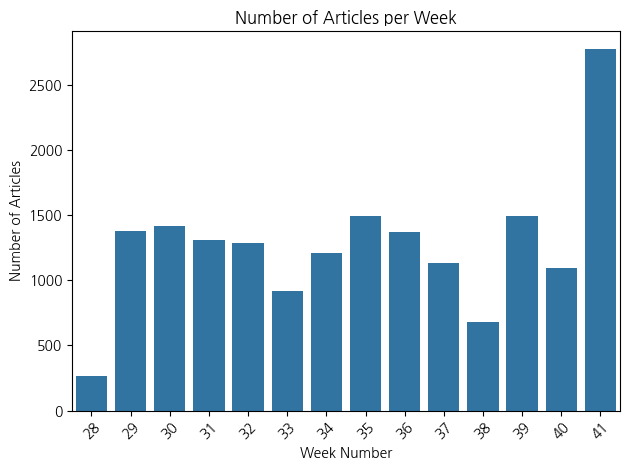

In [ ]:
# prompt: 주별 기사건수 막대그래프 시각화

import seaborn as sns
# Group by week and count articles
df['week'] = df['일자'].dt.isocalendar().week
weekly_counts = df.groupby('week')['제목'].count()

# Create the bar plot
sns.barplot(x=weekly_counts.index, y=weekly_counts.values)
plt.xlabel('Week Number')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

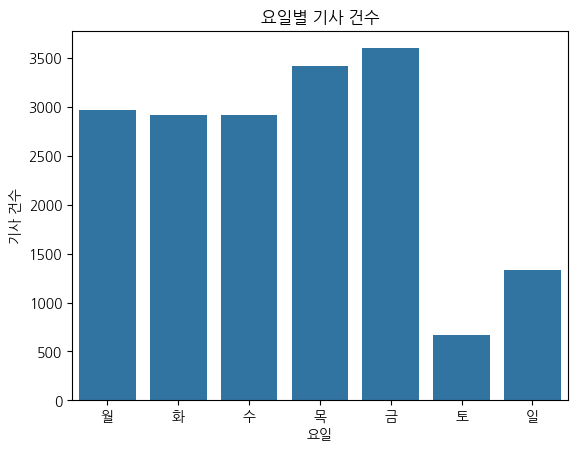

In [ ]:
# prompt: 요일별 기사건수 막대그래프 시각화

# 요일별 기사 건수 막대 그래프 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 요일별 기사 건수 계산
dayofweek_counts = df['일자'].dt.dayofweek.value_counts().sort_index()

# 요일 이름 매핑
days = ['월', '화', '수', '목', '금', '토', '일']
dayofweek_counts.index = [days[i] for i in dayofweek_counts.index]


# 막대 그래프 생성
sns.barplot(x=dayofweek_counts.index, y=dayofweek_counts.values)
plt.xlabel('요일')
plt.ylabel('기사 건수')
plt.title('요일별 기사 건수')
plt.show()

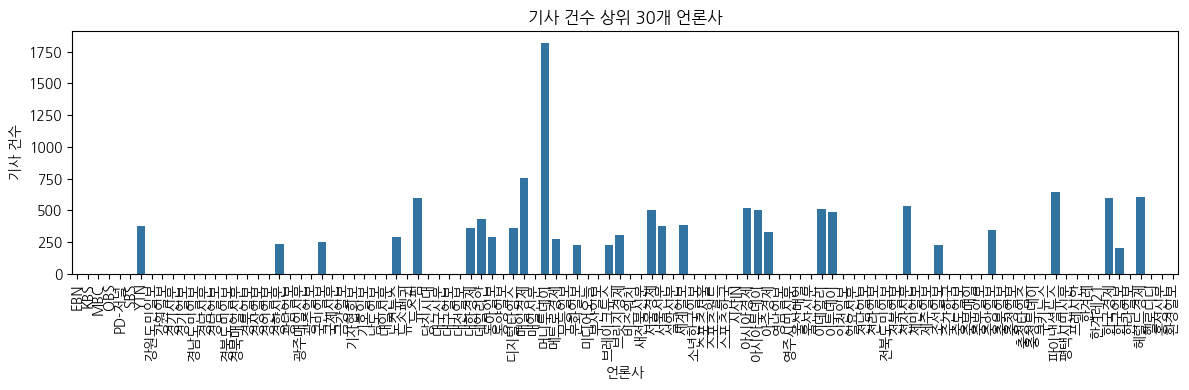

In [ ]:
# prompt: 기사건수가 많은 상위 30개 언론사별 현황을 내림차순으로 시각화
# Assuming 'df' is your DataFrame and it has a column named '언론사'
top_press = df['언론사'].value_counts().head(30)

plt.figure(figsize=(12, 4))
sns.barplot(x=top_press.index, y=top_press.values)
plt.xlabel('언론사')
plt.ylabel('기사 건수')
plt.title('기사 건수 상위 30개 언론사')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
top_press.index#, y=top_press.values

CategoricalIndex(['머니투데이', '매일경제', '파이낸셜뉴스', '헤럴드경제', '뉴스핌', '한국경제', '전자신문',
                  '아시아경제', '이데일리', '서울경제', '아시아투데이', '이투데이', '데일리안', '세계일보',
                  '서울신문', 'YTN', '디지털타임스', '대한경제', '중앙일보', '아주경제', '브릿지경제',
                  '동아일보', '노컷뉴스', '메트로경제', '국민일보', '경향신문', '조선일보', '브레이크뉴스',
                  '문화일보', '한국일보'],
                 categories=['EBN', 'KBS', 'MBC', 'OBS', ..., '헤럴드경제', '헬로디디', '홍성신문', '환경일보'], ordered=False, dtype='category', name='언론사')

In [ ]:
df['기고자'].value_counts(dropna=False).reset_index()[1:][:10]

,기고자,count
1,최태범|기자,464
2,남미래|기자,235
3,김태현|기자,202
4,고석용|기자,129
5,YTN,73
6,김성휘|기자,72
7,박동제 기자,66
8,박기영|기자,50
9,온라인뉴스팀,49
10,권준영,48


In [ ]:
df[df['기고자'] == '남미래']

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2,week


In [ ]:
# prompt: 분류1, 2별로 기사건수

# Group by '분류1' and count articles
classification1_counts = df.groupby(['분류1', '분류2'])['제목'].count()

classification1_counts

분류1    분류2    
IT_과학  IT_과학일반    387
       과학         695
       모바일        987
       보안         426
       인터넷_SNS    252
                 ... 
지역     전북         181
       제주          72
       지역일반        31
       충남         515
       충북         142
Name: 제목, Length: 83, dtype: int64

<Axes: xlabel='분류2', ylabel='분류1'>

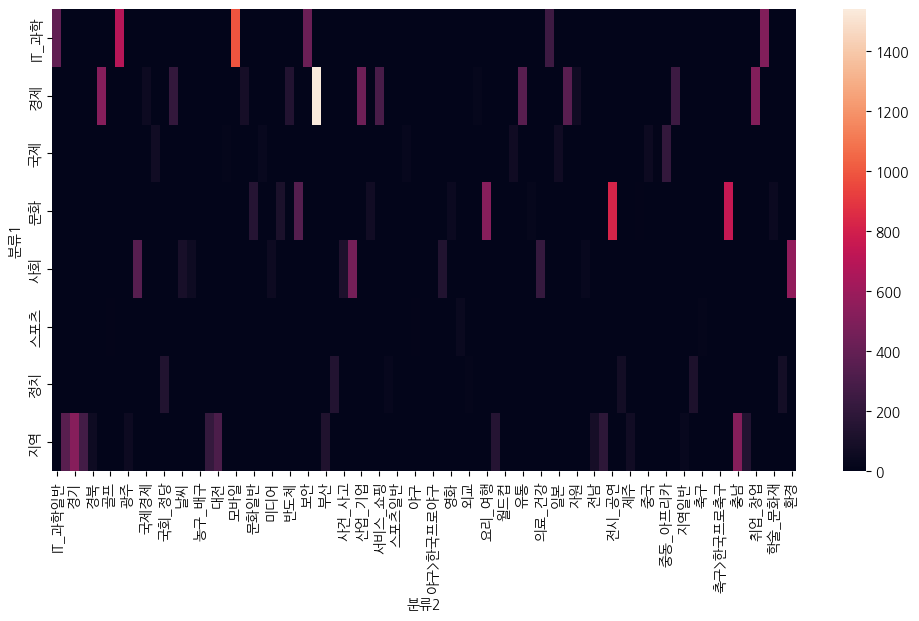

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(classification1_counts.unstack().fillna(0).astype(int))

- 본문 분석 (월별, 요일별 출현단어 빈도 분석)

In [ ]:
# prompt: 월별, 요일별 컬럼만들기

# 월별 컬럼 추가
df['월'] = df['일자'].dt.month

# 요일별 컬럼 추가 (숫자로 표현, 0:월요일, 6:일요일)
df['요일'] = df['일자'].dt.dayofweek

# 요일을 한글로 표시 (옵션)
days = ['월', '화', '수', '목', '금', '토', '일']
df['요일(한글)'] = df['요일'].map(lambda x: days[x])

In [ ]:
df.head()

,일자,언론사,기고자,제목,인물,위치,기관,본문,분류1,분류2,week,월,요일,요일(한글)
0,2024-08-05,KBS,배지현,"‘찜통 더위’ 피하러 강으로, 놀이공원으로",None,"한강,서울,강남구,은평구,한국,서울시",겨울왕국,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...,사회,날씨,32,8,0,월
1,2024-09-17,브레이크뉴스,박동제 기자,"에스파 1위, 9월 아이돌그룹 브랜드평판 정상 등극..2위 아이브 3위 세븐틴","브레이크뉴스,세븐틴,아이브,에스파","la,La,Korea","Reputation Research Institute,aespa,Hoshi,Seun...","▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...",경제,증권_증시,38,9,1,화
2,2024-10-10,KBS,이유진,보은대추축제 내일부터 열흘간 개최,None,"한강,경기,백두,보은,뱃들공원,속리산,보청천,태백",1kg,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...,문화,전시_공연,41,10,3,목
3,2024-10-12,SBS,심우섭 기자,"""울면서 번역했어요"" 일등공신 번역가들","데버라,박상영","스페인,스웨덴,영국,터내셔널,영미권,한국,적도","한강,맨부커",<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...,문화,전시_공연,41,10,5,토
4,2024-07-18,세계일보,None,서울 잠수교 차량 보행자 통행 전면 통제,None,"한강,서울,인도,팔당댐,잠수교,서울시,서초구,중부지방","재난안전대책본부,경찰,잠수교,서울시",집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...,사회,환경,29,7,3,목


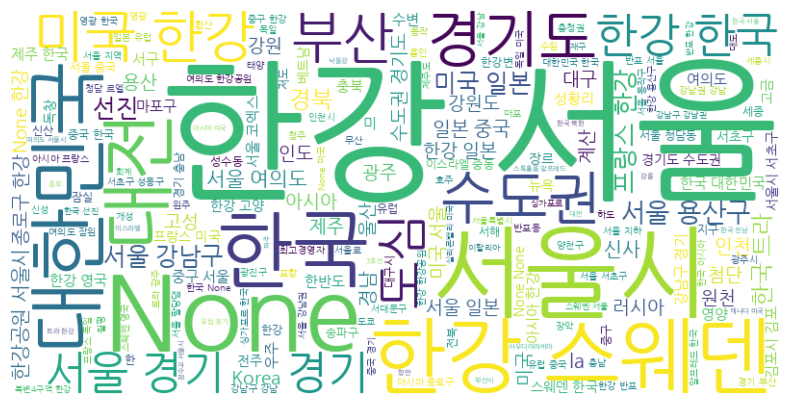

In [ ]:
# prompt: 위치 컬럼의 출현단어를 워드클라우드로

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and '위치' is the column you want to analyze
text = ' '.join(df['위치'].astype(str).dropna())  # Combine all non-missing values into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.columns

Index(['일자', '언론사', '기고자', '제목', '인물', '위치', '기관', '본문', '분류1', '분류2', 'week',
       '월', '요일', '요일(한글)'],
      dtype='object')

In [ ]:
path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/Capstone_03_SentimentAnalysis.pkl'

In [ ]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
df[['일자', '본문']].to_pickle(path)

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [ ]:
df = pd.read_pickle(path)
df.head()

,일자,본문
0,2024-08-05,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,2024-09-17,"▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,2024-10-10,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,2024-10-12,<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,2024-07-18,집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...


In [ ]:
for i in df[:3].iterrows():
    print(i)
    print(f'\n본문 내용: {i[1]}')
  #  break

(0, 일자                                  2024-08-05 00:00:00
본문    [앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
Name: 0, dtype: object)

본문 내용: 일자                                  2024-08-05 00:00:00
본문    [앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
Name: 0, dtype: object
(1, 일자                                  2024-09-17 00:00:00
본문    ▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...
Name: 1, dtype: object)

본문 내용: 일자                                  2024-09-17 00:00:00
본문    ▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>...
Name: 1, dtype: object
(2, 일자                                  2024-10-10 00:00:00
본문    [KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
Name: 2, dtype: object)

본문 내용: 일자                                  2024-10-10 00:00:00
본문    [KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
Name: 2, dtype: object


In [ ]:
for i in df['본문'][:5]:
    print(i)
    print('*'*100)

[앵커]

 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있겠죠.

 극한 폭염을 피해 강으로, 빙판으로 몰려든 시민들의 모습을 배지현 기자가 전해드립니다.

 [리포트] 

불볕 더위 속 겨울왕국이 펼쳐진 실내 스케이트장.

 꽁꽁 얼어붙은 빙판 위 피서 인파가 가득합니다.

 얼음 위 엉거주춤 불안한 발걸음에, 쿵 넘어져도 계절을..
****************************************************************************************************
▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>     ©브레이크뉴스 
 










   
 


   
 


 브레이크뉴스 박동제 기자= 아이돌그룹 브랜드평판 2024년 9월 빅데이터 분석결과 1위 에스파, 2위 아이브, 3위 세븐틴 순으로 나타났다.​​ 
 


   
 


 한국기업평판연구소는 17일..
****************************************************************************************************
[KBS 청주]
보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일대에서 열립니다.

이번 행사에서는 생대추 1kg을 크기에 따라 12,000원에서 25,000원 선에 살 수 있습니다.

또, 트로트와 퓨전 국악, 뮤지컬 갈라쇼, 마술쇼 등 다양한 공연이 진행됩니다.

이밖에 '보은 민속 소 힘겨루기 대회'가 16일에서 20일까지 보청천 ..
****************************************************************************************************
<앵커> 
 
 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에서 그 가치를 인정받지 못했습니다. 이번 쾌거 뒤에는 현지 독자들의 정서에 꾸준히 다가서기

In [ ]:
 df['본문'][:5]

,본문
0,[앵커]\n\n 아무리 더운 날씨도 시원한 물과 얼음이 있다면 거뜬히 이겨낼 수 있...
1,"▲ 에스파(aespa / 카리나, 윈터, 지젤, 닝닝) <사진출처=SM엔터테인먼트>..."
2,[KBS 청주]\n보은대추축제가 오는 내일부터 열흘 동안 보은 뱃들공원과 속리산 일...
3,<앵커> \n \n 그동안 뛰어난 우리 문학 작품들은 번역의 어려움으로 세계 무대에...
4,집중호우로 한강 수위가 계속 상승하면서 18일 오후 2시 15분께부터 서울 잠수교 ...


In [ ]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.8 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
import re

# 형태소 분석기 초기화
okt = Okt()

# 각 기사에서 단어 추출 (길이가 1인 단어 및 숫자로 시작하는 단어 제외)
for idx, article in  enumerate(df['본문'][:5]):
    # 텍스트 정제 (특수 문자 제거)
    clean_article = re.sub(r'[^\w\s]', '', article)
    # 형태소 분석을 통해 명사 추출
    nouns = okt.nouns(clean_article)
    # 길이가 1인 단어 및 아라비아 숫자로 시작하는 단어 제거
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun)]

    # 결과 출력
    print(f"{idx+1}번째 기사에서 명사 추출: {filtered_nouns}")

1번째 기사에서 명사 추출: ['앵커', '날씨', '얼음', '극한', '폭염', '피해', '빙판', '시민', '모습', '배지현', '기자', '리포트', '불볕', '더위', '겨울왕국', '실내', '스케이트장', '꽁꽁', '빙판', '인파', '얼음', '엉거주춤', '발걸음', '계절']
2번째 기사에서 명사 추출: ['에스', '카리나', '윈터', '지젤', '닝닝', '사진', '출처', '엔터테인먼트', '브레이크뉴스', '브레이크뉴스', '박동', '기자', '아이돌', '그룹', '브랜드', '평판', '빅데이터', '분석', '결과', '에스', '아이브', '세븐', '한국', '기업', '평판', '연구소']
3번째 기사에서 명사 추출: ['청주', '보은', '대추', '축제', '내일', '열흘', '동안', '보은', '공원', '속리산', '일대', '이번', '행사', '대추', '크기', '트로트', '퓨전', '국악', '뮤지컬', '갈라', '마술', '공연', '진행', '보은', '민속', '힘겨루기', '대회', '보청']
4번째 기사에서 명사 추출: ['앵커', '그동안', '우리', '문학', '작품', '번역', '어려움', '세계', '무대', '가치', '이번', '쾌거', '현지', '독자', '정서', '번역가', '노력', '평가', '심우섭', '기자', '기자', '지난', '인터내셔널', '한강', '가장', '먼저']
5번째 기사에서 명사 추출: ['집중호우', '한강', '수위', '계속', '상승', '오후', '서울', '잠수교', '차량', '통행', '전면', '통제', '경찰', '관계자', '오후', '잠수교', '수위', '선제', '조치', '차량', '통행', '통제', '중이', '연일', '이어진', '집중호우', '한강', '수위', '상승', '서울', '서초구', '잠수교', '보행', '통제', '잠수교', '수위']


In [ ]:
# prompt: df의 본문컬럼에서 단어를 추출하여 list 형태의 corpus 만들기, tqdm이용

from tqdm import tqdm

# Assuming 'df' and 'okt' are already defined as in your provided code

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article)) # Handle potential NaN values

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)
        # 길이가 1인 단어 및 아라비아 숫자로 시작하는 단어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun)]
        corpus.extend(filtered_nouns)
    return corpus

# Example usage:
corpus = extract_words_from_corpus(df.sample(frac=0.1))
print(f"Corpus created successfully with {len(corpus)} words")

Extracting words: 100%|██████████| 5342/5342 [01:42<00:00, 52.07it/s]

Corpus created successfully with 188509 words


In [ ]:
corpus[:10]

['단군', '최대', '재건축', '올림픽', '파크', '레온', '주가', '가량', '소위', '주장']

In [ ]:
path

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
path[:106]

'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/'

In [ ]:
# prompt: corpus를 txt로 저장하고 다시 읽기

# Save the corpus to a text file
corpus_file_path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/corpus.txt'  # Define the file path

with open(corpus_file_path, 'w', encoding='utf-8') as f:
    for word in corpus:
        f.write(word + '\n')

print(f"Corpus saved to {corpus_file_path}")


# Read the corpus from the text file
loaded_corpus = []
with open(corpus_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        loaded_corpus.append(line.strip())  # Remove leading/trailing whitespace

print(f"Corpus loaded successfully with {len(loaded_corpus)} words")
print(f"First 10 words of the loaded corpus: {loaded_corpus[:10]}")

Corpus saved to /content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/corpus.txt
Corpus loaded successfully with 188509 words
First 10 words of the loaded corpus: ['단군', '최대', '재건축', '올림픽', '파크', '레온', '주가', '가량', '소위', '주장']


- 워드클라우드 시각화

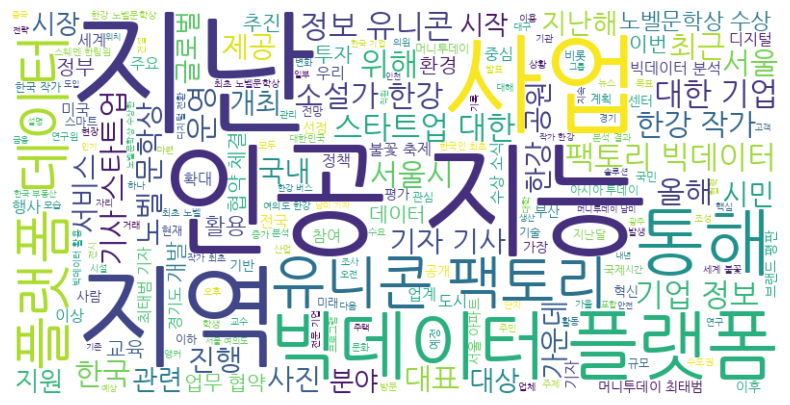

In [ ]:
# prompt: corpus를 워트클라우드로

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the corpus (assuming 'loaded_corpus' is defined as in your previous code)

# Combine words into a single string
text = " ".join(loaded_corpus)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re

# ... (Your existing code)

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus = extract_words_from_corpus(df.sample(frac=0.1))
print(f"Corpus created successfully with {len(corpus)} words")
corpus[:10]
# ... (Rest of your code)


- tf-idf 매트릭스 생성

In [ ]:
# prompt: df['본문']을 일자별 기사로 countvector를 만들어다오

from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['본문'] is your text data
vectorizer = CountVectorizer()

# Create the document-term matrix
dtm = vectorizer.fit_transform(df['본문'])

# Convert to DataFrame for better visualization
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Print or further process the DataFrame
print(dtm_df.head())

   00  000  000120  000240  000490  000880  000가구  000개  000개를  000님의  ...  \
0   0    0       0       0       0       0      0     0      0      0  ...   
1   0    0       0       0       0       0      0     0      0      0  ...   
2   0    0       0       0       0       0      0     0      0      0  ...   
3   0    0       0       0       0       0      0     0      0      0  ...   
4   0    0       0       0       0       0      0     0      0      0  ...   

   힙합  洛東江  露地  籠橋  兩水里  龍華山  劉宏  李民  臨場  立秋  
0   0    0   0   0    0    0   0   0   0   0  
1   0    0   0   0    0    0   0   0   0   0  
2   0    0   0   0    0    0   0   0   0   0  
3   0    0   0   0    0    0   0   0   0   0  
4   0    0   0   0    0    0   0   0   0   0  

[5 rows x 120656 columns]
